In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [66]:
# 경고메세지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [67]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/상가업소정보_201912_02.csv", sep='|')
data.shape

(528311, 39)

In [68]:
plt.rc("font",family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
set_matplotlib_formats("retina")

In [6]:
data.shape

(528311, 39)

In [7]:
data.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19917773,대구통닭,통통치킨상인2호점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2729011500115310012015585,NaN,대구광역시 달서구 상화북로43길 74,704370.0,42806.0,NaN,1,NaN,128.546040,35.817554
1,19919475,빵마루,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,2726011200107610008006755,녹원아파트,대구광역시 수성구 무학로 187,706090.0,42183.0,NaN,1,NaN,128.628821,35.830867


In [25]:
data.isnull().mean()

상가업소번호       0.000000
상호명          0.000000
지점명          0.880434
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
표준산업분류코드     0.060907
표준산업분류명      0.060907
시도코드         0.000000
시도명          0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000000
법정동코드        0.000000
법정동명         0.000000
지번코드         0.000000
대지구분코드       0.000000
대지구분명        0.000000
지번본번지        0.000000
지번부번지        0.189617
지번주소         0.000000
도로명코드        0.000000
도로명          0.000000
건물본번지        0.000000
건물부번지        0.839481
건물관리번호       0.000000
건물명          0.676172
도로명주소        0.000000
구우편번호        0.000119
신우편번호        0.000030
동정보          0.900748
층정보          0.530909
호정보          0.822784
경도           0.000000
위도           0.000000
dtype: float64

In [69]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']

df = data[columns].copy()
df.shape

(528311, 11)

In [70]:
df.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,대구통닭,음식,닭/오리요리,후라이드/양념치킨,대구광역시,달서구,상인1동,상인동,대구광역시 달서구 상화북로43길 74,128.54604,35.817554


In [71]:
df_daejeon = df[df['시도명'] == '대전광역시'].copy()
df_daejeon.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
22,한미푸드,소매,음/식료품소매,식자재판매,대전광역시,중구,대흥동,대흥동,대전광역시 중구 대흥로28번길 47,127.419096,36.323250
23,산봉냉면,음식,한식,냉면집,대전광역시,서구,둔산2동,둔산동,대전광역시 서구 대덕대로 211,127.378173,36.351866


In [12]:
df_daejeon['시군구명'].nunique()

5

In [13]:
df_daejeon.shape

(91229, 11)

In [14]:
df_daejeon.to_csv("daejeon.csv", index=False)

In [15]:
pd.read_csv("daejeon.csv")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,한미푸드,소매,음/식료품소매,식자재판매,대전광역시,중구,대흥동,대흥동,대전광역시 중구 대흥로28번길 47,127.419096,36.323250
1,산봉냉면,음식,한식,냉면집,대전광역시,서구,둔산2동,둔산동,대전광역시 서구 대덕대로 211,127.378173,36.351866
2,돌다리식당,음식,한식,한식/백반/한정식,대전광역시,중구,석교동,석교동,대전광역시 중구 대종로 234-17,127.442208,36.310580
3,또래오래,음식,닭/오리요리,후라이드/양념치킨,대전광역시,중구,태평1동,태평동,대전광역시 중구 수침로55번길 37,127.398644,36.325212
4,무지개횟집,음식,일식/수산물,횟집,대전광역시,서구,정림동,정림동,대전광역시 서구 정림동로7번길 22,127.366426,36.305534
...,...,...,...,...,...,...,...,...,...,...,...
91224,신천농산,소매,음/식료품소매,청과물소매,대전광역시,중구,목동,목동,대전광역시 중구 목동로 37,127.405574,36.335179
91225,청석골칡냉면장터국밥,음식,한식,냉면집,대전광역시,서구,도마2동,도마동,대전광역시 서구 사마7길 5,127.373907,36.316839
91226,세이광고기획,생활서비스,광고/인쇄,광고물제작-종합,대전광역시,대덕구,덕암동,덕암동,대전광역시 대덕구 덕암로249번길 28,127.422767,36.442971
91227,광닭발,음식,닭/오리요리,닭내장/닭발요리,대전광역시,유성구,노은3동,지족동,대전광역시 유성구 지족북로13번길 14-20,127.301451,36.386969


In [16]:
df_daejeon['상호명_소문자'] = df_daejeon['상호명'].str.lower()

In [17]:
df_daejeon.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
22,한미푸드,소매,음/식료품소매,식자재판매,대전광역시,중구,대흥동,대흥동,대전광역시 중구 대흥로28번길 47,127.419096,36.323250,한미푸드
23,산봉냉면,음식,한식,냉면집,대전광역시,서구,둔산2동,둔산동,대전광역시 서구 대덕대로 211,127.378173,36.351866,산봉냉면


In [18]:
df_daejeon.loc[df_daejeon['상호명_소문자'].str.contains("배스킨|베스킨|31|baskin"), '브랜드명'] = '배스킨라빈스'

In [19]:
df_daejeon.loc[df_daejeon['상호명_소문자'].str.contains("던킨|dunkin|던킨도너츠"), '브랜드명'] = '던킨도너츠'

In [20]:
df_31 = df_daejeon[df_daejeon['상호명_소문자'].str.contains("배스킨|베스킨|baskin|던킨|dunkin")].copy()
df_31.shape

(112, 13)

In [21]:
df_31.loc[df_31['상호명_소문자'].str.contains("배스킨|베스킨|31|baskin"), '브랜드명'] = '배스킨라빈스'
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
2310,배스킨라빈스31,음식,패스트푸드,아이스크림판매,대전광역시,서구,가수원동,도안동,대전광역시 서구 도안북로93번길 7,127.338602,36.330366,배스킨라빈스31,배스킨라빈스
28199,베스킨라벤스,음식,패스트푸드,아이스크림판매,대전광역시,중구,문화1동,문화동,대전광역시 중구 계백로 1700,127.408803,36.320631,베스킨라벤스,배스킨라빈스
29237,대전역3층던킨도너츠점,음식,패스트푸드,도너츠전문,대전광역시,동구,중앙동,정동,대전광역시 동구 중앙로 215,127.432113,36.334398,대전역3층던킨도너츠점,던킨도너츠
41262,베스킨라빈스,음식,패스트푸드,아이스크림판매,대전광역시,서구,탄방동,탄방동,대전광역시 서구 문정로 96,127.389914,36.346429,베스킨라빈스,배스킨라빈스
58892,베스킨라빈스,음식,패스트푸드,아이스크림판매,대전광역시,유성구,신성동,신성동,대전광역시 유성구 신성남로 45,127.350008,36.386630,베스킨라빈스,배스킨라빈스


In [62]:
df_31.loc[~df_31['상호명_소문자'].str.contains("배스킨|베스킨|31|baskin"), '브랜드명'] = '던킨도너츠'
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
2310,배스킨라빈스31,음식,패스트푸드,아이스크림판매,대전광역시,서구,가수원동,도안동,대전광역시 서구 도안북로93번길 7,127.338602,36.330366,배스킨라빈스31,배스킨라빈스
28199,베스킨라벤스,음식,패스트푸드,아이스크림판매,대전광역시,중구,문화1동,문화동,대전광역시 중구 계백로 1700,127.408803,36.320631,베스킨라벤스,배스킨라빈스
29237,대전역3층던킨도너츠점,음식,패스트푸드,도너츠전문,대전광역시,동구,중앙동,정동,대전광역시 동구 중앙로 215,127.432113,36.334398,대전역3층던킨도너츠점,던킨도너츠
41262,베스킨라빈스,음식,패스트푸드,아이스크림판매,대전광역시,서구,탄방동,탄방동,대전광역시 서구 문정로 96,127.389914,36.346429,베스킨라빈스,배스킨라빈스
58892,베스킨라빈스,음식,패스트푸드,아이스크림판매,대전광역시,유성구,신성동,신성동,대전광역시 유성구 신성남로 45,127.350008,36.386630,베스킨라빈스,배스킨라빈스


In [22]:
df_31['상권업종대분류명'].value_counts().copy()


음식    112
Name: 상권업종대분류명, dtype: int64

`` *countplot은 자체적으로 값을 count해주기 떄문에 x축 한개 변수만 넣어주면 된다! ``

In [23]:
brand_count =df_31['브랜드명'].value_counts().copy()
brand_count

배스킨라빈스    85
던킨도너츠     27
Name: 브랜드명, dtype: int64

In [24]:
df_31['브랜드명'].value_counts(normalize=True)

배스킨라빈스    0.758929
던킨도너츠     0.241071
Name: 브랜드명, dtype: float64

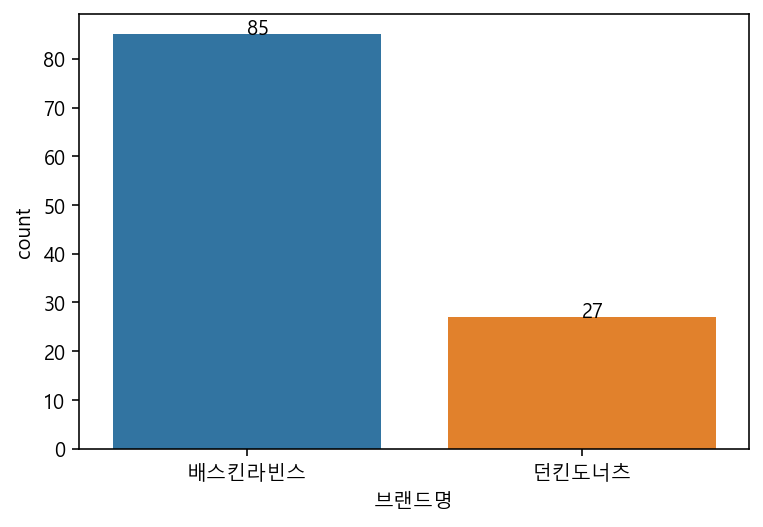

In [76]:
g = sns.countplot(data=df_31, x='브랜드명')
for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

In [86]:
brand_count = df_31['시군구명'].value_counts().copy()
brand_count

서구     40
유성구    27
중구     18
동구     18
대덕구     9
Name: 시군구명, dtype: int64

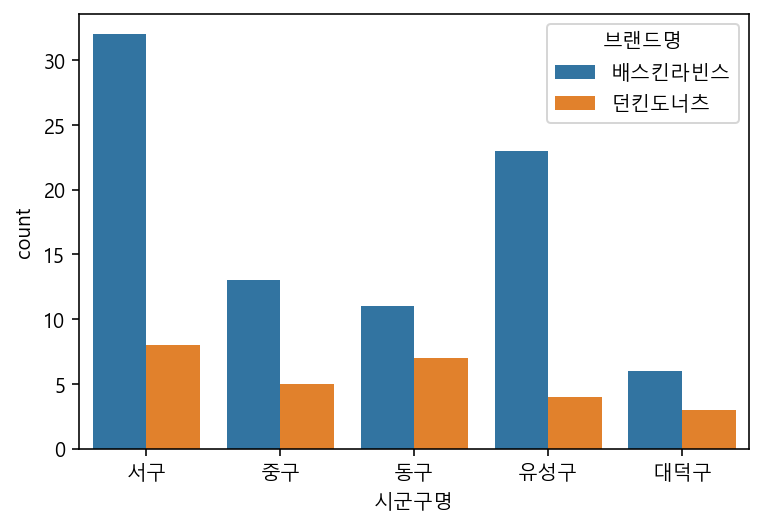

In [91]:
sns.countplot(data=df_31, x='시군구명', hue='브랜드명')



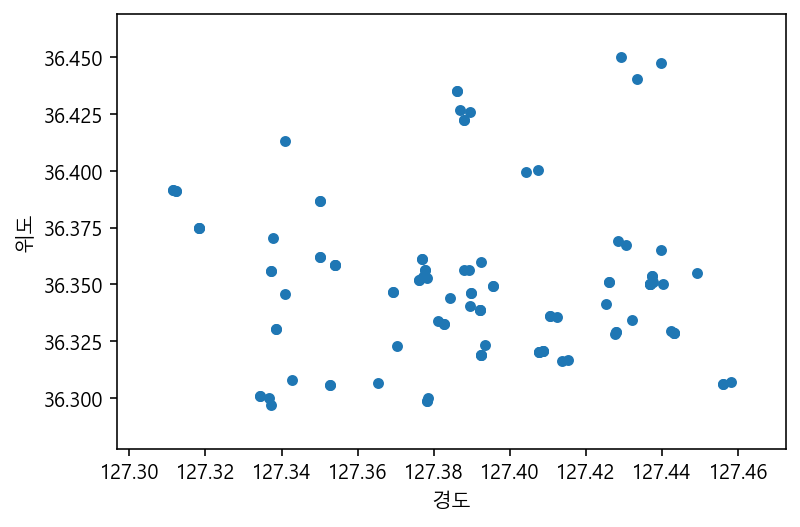

In [95]:
df_31[['위도','경도']].plot.scatter(x='경도',y='위도')

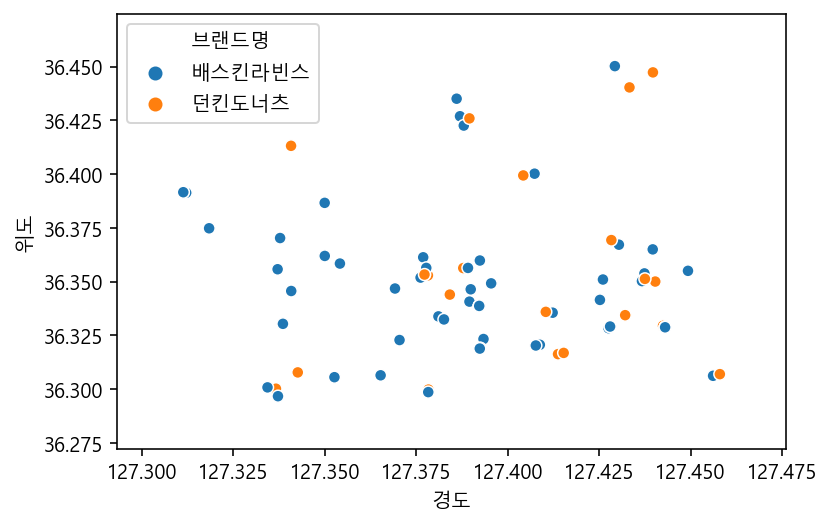

In [96]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

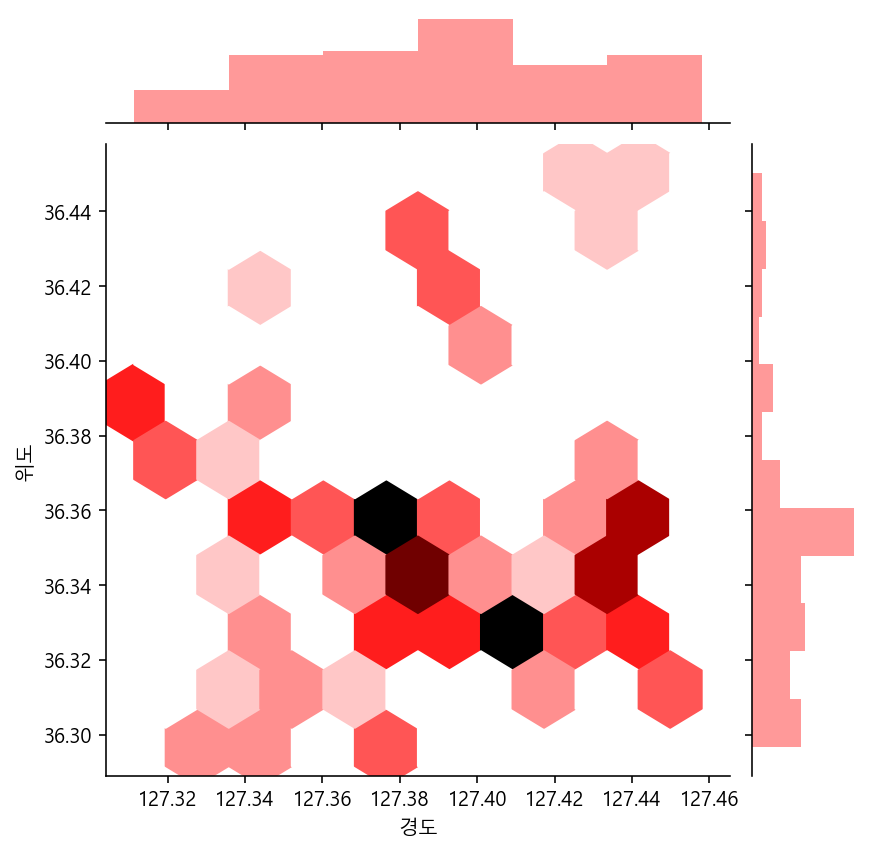

In [99]:
sns.jointplot(data=df_31, x='경도', y='위도', kind='hex', color='red')

In [25]:
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
2310,배스킨라빈스31,음식,패스트푸드,아이스크림판매,대전광역시,서구,가수원동,도안동,대전광역시 서구 도안북로93번길 7,127.338602,36.330366,배스킨라빈스31,배스킨라빈스
28199,베스킨라벤스,음식,패스트푸드,아이스크림판매,대전광역시,중구,문화1동,문화동,대전광역시 중구 계백로 1700,127.408803,36.320631,베스킨라벤스,배스킨라빈스
29237,대전역3층던킨도너츠점,음식,패스트푸드,도너츠전문,대전광역시,동구,중앙동,정동,대전광역시 동구 중앙로 215,127.432113,36.334398,대전역3층던킨도너츠점,던킨도너츠
41262,베스킨라빈스,음식,패스트푸드,아이스크림판매,대전광역시,서구,탄방동,탄방동,대전광역시 서구 문정로 96,127.389914,36.346429,베스킨라빈스,배스킨라빈스
58892,베스킨라빈스,음식,패스트푸드,아이스크림판매,대전광역시,유성구,신성동,신성동,대전광역시 유성구 신성남로 45,127.350008,36.386630,베스킨라빈스,배스킨라빈스


In [28]:
lat = df_31['위도'].mean()
long = df_31['경도'].mean()

In [31]:
import folium

In [35]:
m = folium.Map(location=[lat,long], zoom_start=12)

for i in df_31.index:
    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명']+"-"+df_31.loc[i, '도로명주소']
    icon_color = 'orange'
    if df_31.loc[i,'브랜드명'] == '배스킨라빈스':
        icon_color = 'blue'
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                       color=icon_color,
                       radius=3,
                       tooltip=title).add_to(m)
m

In [38]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[lat,long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)
for i in df_31.index:
    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명']+"-"+df_31.loc[i, '도로명주소']
    icon_color = 'orange'
    if df_31.loc[i,'브랜드명'] == '배스킨라빈스':
        icon_color = 'blue'
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                       color=icon_color,
                       radius=3,
                       tooltip=title).add_to(marker_cluster)
m

In [40]:
df_daejeon['상호명'].value_counts()

점프셈교실              328
간단하지만특별한화피디Cafe    288
GS25               276
CU                 245
세븐일레븐              208
                  ... 
그댄봄비를무척좋아하나요         1
뉴스크럽                 1
카오                   1
형제젓갈상회               1
케이앤씨에프               1
Name: 상호명, Length: 71179, dtype: int64

In [42]:
# 점프셈교실 어떤 구역에 많이 분포하는지 분석해보기

In [72]:
df_jump = df_daejeon[df_daejeon['상호명'].str.contains('점프셈교실')].copy()
df_jump.shape

(328, 11)

In [73]:
df_jump.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
90910,점프셈교실,학문/교육,학원-보습교습입시,학원-입시,대전광역시,중구,산성동,사정동,대전광역시 중구 대둔산로 344,127.385555,36.299929


In [74]:
df_jump['상권업종대분류명'].value_counts()

학문/교육    313
생활서비스     11
소매         4
Name: 상권업종대분류명, dtype: int64

In [75]:
df_jump = df_jump[~df_jump['상권업종대분류명'].str.contains("생활서비스|소매")].copy()
df_jump.shape

(313, 11)

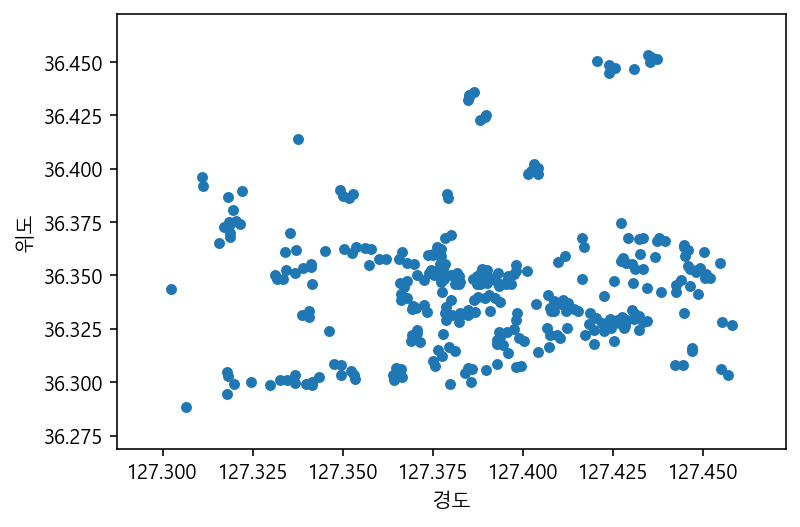

In [55]:
# plot의 scatter로 위도, 경도 시각화
df_jump.plot.scatter(x='경도',y='위도')

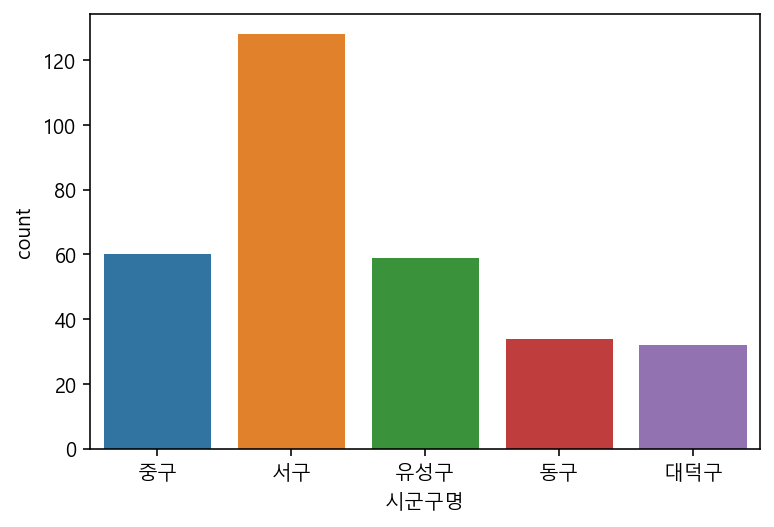

In [57]:
# countplot으로 구마다 몇 개 있는지 보기
sns.countplot(data=df_jump, x='시군구명')

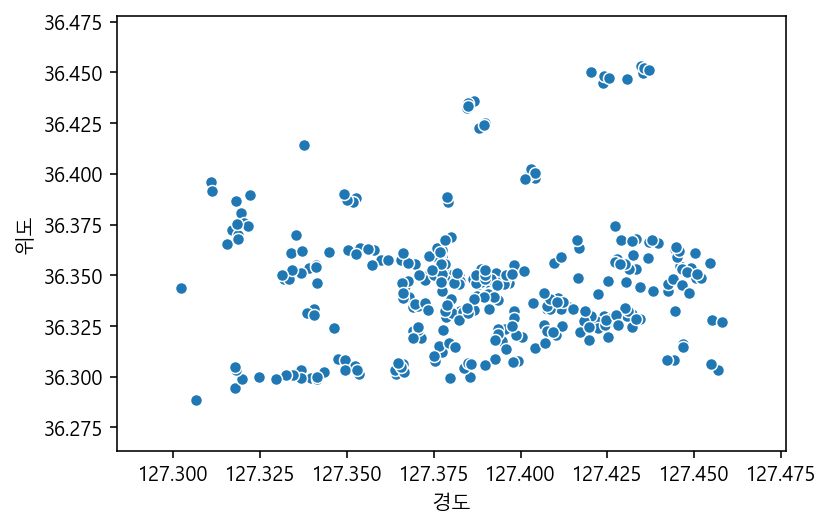

In [58]:
# scatterplot으로 위도, 경도 시각화 해보기
sns.scatterplot(data=df_jump, x='경도',y='위도')

In [64]:
# folium의 MarkupCluster로 나타내고 Marker은 일반 Marker로
lat = df_jump['위도'].mean()
long = df_jump['경도'].mean()

m = folium.Map(location=[lat,long], zoom_start=13)
mark_cluster = MarkerCluster().add_to(m)

for n in df_jump.index:
    sub_lat = df_jump.loc[n, '위도']
    sub_long = df_jump.loc[n, '경도']
    title = df_jump.loc[n, '상호명']+"-"+df_jump.loc[n, '도로명주소']
    icon_color = 'red'
    
    folium.Marker(location=[sub_lat, sub_long],
                 icon=folium.Icon(color=icon_color)).add_to(mark_cluster)
m

In [83]:
from folium.plugins import HeatMap

lat = df_jump['위도'].mean()
long = df_jump['경도'].mean()

m = folium.Map(location=[lat,long], zoom_start=13)

heat = df_jump[['위도','경도']].copy()
heat = heat.values

HeatMap(heat).add_to(m)
m